## 1

### Vertical sample arrangement

<class 'numpy.ndarray'>
areas shape: 
 (4,)
prices shape: 
 (4, 1)
areas: 
 [6.7 4.6 3.5 5.5]
prices: 
 [[9.1]
 [5.9]
 [4.6]
 [6.7]]
data_size:  4


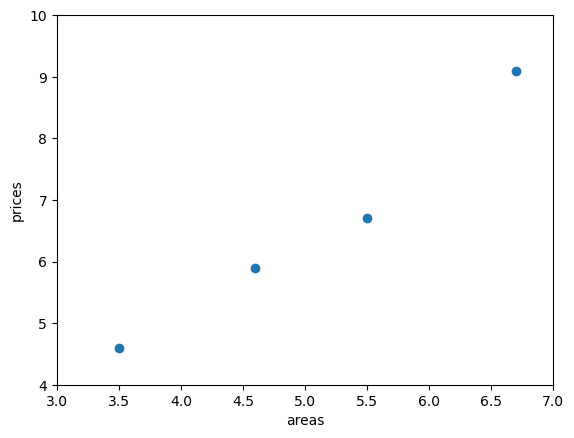

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('../data/simple_data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1:]
N = areas.size

print(type(areas))
print('areas shape: \n', areas.shape)
print('prices shape: \n', prices.shape)
print('areas: \n', areas)
print('prices: \n', prices)
print('data_size: ', N)

plt.scatter(areas, prices)
plt.xlabel('areas')
plt.ylabel('prices')
plt.xlim(3,7)
plt.ylim(4,10)
plt.show()

In [10]:
# vector [x, b]^T
x_bias = np.vstack([areas, np.ones((N,))])
print('x_bias \n', x_bias)
print('x_bias shape', x_bias.shape)

theta = np.array([[-0.34], [0.04]]) #[w, b]
print('theta \n', theta)
print(theta.shape)

x_bias 
 [[6.7 4.6 3.5 5.5]
 [1.  1.  1.  1. ]]
x_bias shape (2, 4)
theta 
 [[-0.34]
 [ 0.04]]
(2, 1)


In [11]:
epoch_max = 10
m = 2
for epoch in range(1):
    for i in range(0, N, m):# train m sample for each step

        # get m samples
        x = x_bias[:, i:i+m]
        y = prices[i:i+m, :]

        print("i = ", i, ": ")
        print('x: \n', x)
        print('y: \n', y)

        # break
    # break

i =  0 : 
x: 
 [[6.7 4.6]
 [1.  1. ]]
y: 
 [[9.1]
 [5.9]]
i =  2 : 
x: 
 [[3.5 5.5]
 [1.  1. ]]
y: 
 [[4.6]
 [6.7]]


#### Loading again 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data   = np.genfromtxt('../data/simple_data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1:]
N = areas.size

# vector [x, b]^T
data = np.vstack([areas, np.ones((N,))])

 # [w, b]
theta = np.array([[-0.34],
                  [0.04]])

# params
lr = 0.01
epoch_max = 20
m = 2

# logging
losses = []

for epoch in range(epoch_max):
    for i in range(0, N, m):
        # get m samples
        x = data[:, i:i+m]
        y = prices[i:i+m, :]

        # predict y_hat
        y_hat = theta.T.dot(x)

        # compute loss
        #loss = np.multiply((y_hat - y.T), (y_hat - y.T))
        #losses.append(np.mean(loss))
        # cal the loss function by divide into m
        loss = (1/m)*(y_hat - y.T).dot((y_hat - y.T).T) # it not return the scalar anymore
        losses.append(loss[0][0])

        # compute gradient
        k = 2*(y_hat - y.T)
        gradients = np.multiply(np.vstack((k, k)), x)
        gradients = gradients.dot(np.ones((m, 1))) / m

        # update weights
        theta = theta - lr*gradients

print("Final theta: ", theta)

Final theta:  [[1.2317524 ]
 [0.28419312]]


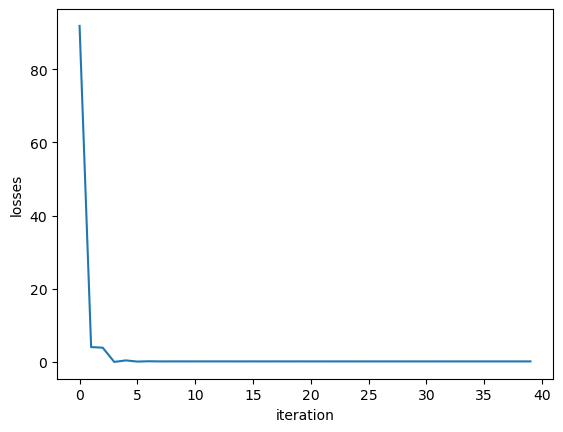

In [15]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

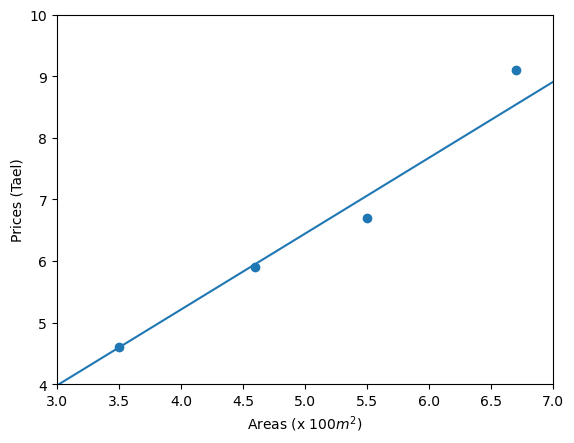

In [17]:
x_data = range(max(0, int(min(areas)) - 1), int(max(areas) + 2))
y_data = [x*theta[0] + theta[1] for x in x_data]
plt.plot(x_data, y_data)
#--------------------------------------
plt.scatter(areas, prices)

plt.xlabel('Areas (x 100$m^2$)')
plt.ylabel('Prices (Tael)')

plt.xlim(3,7)
plt.ylim(4,10)
plt.show()

#### Loading again 2

In [18]:
# using dot product

import numpy as np
import matplotlib.pyplot as plt

data   = np.genfromtxt('../data/simple_data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1:]
N = areas.size

# vector [x, b]^T
data = np.vstack([areas, np.ones((N,))])

 # [w, b]
theta = np.array([[-0.34],
                  [0.04]])

# params
lr = 0.01
epoch_max = 20
m = 2

# logging
losses = []

for epoch in range(epoch_max):
    for i in range(0, N, m):
        # get m samples
        x = data[:, i:i+m]
        y = prices[i:i+m, :]

        # predict y_hat
        y_hat = theta.T.dot(x)

        # compute loss
        #loss = np.multiply((y_hat - y.T), (y_hat - y.T))
        #losses.append(np.mean(loss))
        loss = (1/m)*(y_hat - y.T).dot((y_hat - y.T).T)
        losses.append(loss[0][0])

        # compute gradient
        k = 2*(y_hat-y.T)
        gradients = x.dot(k.T) / m   # Notice! The different here ----------

        # update weights
        theta = theta - lr*gradients

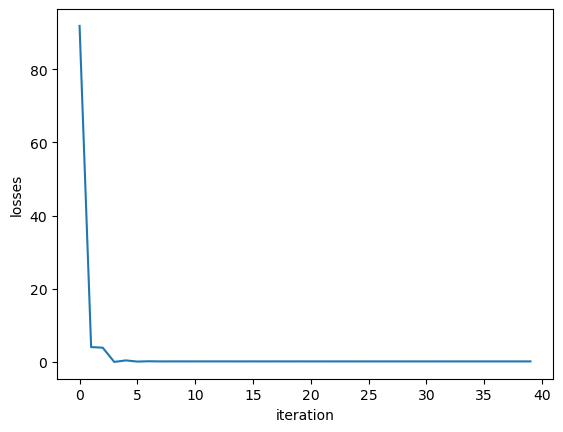

In [19]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

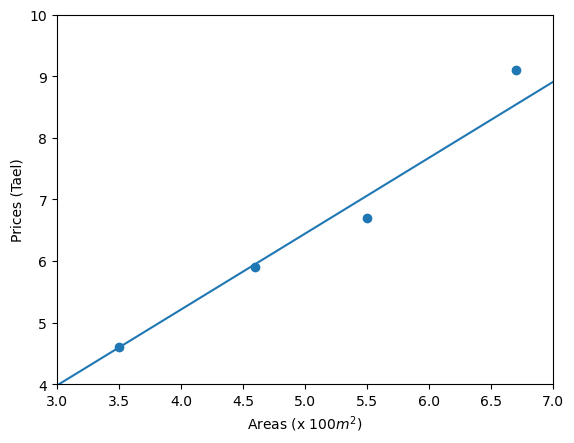

In [20]:
x_data = range(2, 8)
y_data = [x*theta[0] + theta[1] for x in x_data]
plt.plot(x_data, y_data)
#--------------------------------------
plt.scatter(areas, prices)

plt.xlabel('Areas (x 100$m^2$)')
plt.ylabel('Prices (Tael)')

plt.xlim(3,7)
plt.ylim(4,10)
plt.show()

Conlusion: It so complicate for Loading again 1. We should use the easy ways to easy to maintain code.

### Horizontal sample arrangement

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data   = np.genfromtxt('../data/simple_data.csv', delimiter=',')
areas  = data[:,0:1]
prices = data[:,1:]
N = areas.size

# vector [x, b]
data = np.hstack([areas, np.ones((N,1))])

 # [w, b]
theta = np.array([[-0.34],
                  [0.049]])

print(data)
print(theta)
print(prices)

[[6.7 1. ]
 [4.6 1. ]
 [3.5 1. ]
 [5.5 1. ]]
[[-0.34 ]
 [ 0.049]]
[[9.1]
 [5.9]
 [4.6]
 [6.7]]


In [ ]:
# params
lr = 0.01
epoch_max = 20
m = 2

# logging
losses = []

for epoch in range(epoch_max):
    for i in range(0, N, m):
        # get m samples
        x = data[i:i + m, :]
        y = prices[i:i + m, :]

        # predict y_hat
        y_hat = x.dot(theta)

        # compute loss
        #loss = np.multiply((y_hat - y), (y_hat - y))
        #losses.append(np.mean(loss))
        loss = (1 / m)*(y_hat - y).T.dot((y_hat - y))
        print("loss shape: ", loss.shape)
        losses.append(loss[0][0])

        # compute gradient
        k = 2*(y_hat - y)
        gradients = k.T.dot(x) / m
        print("k shape: ", k.shape)
        print("gradients shape: ", gradients.shape)

        # update weights
        theta = theta - lr*gradients.T
        print("theta shape: ", k.shape)

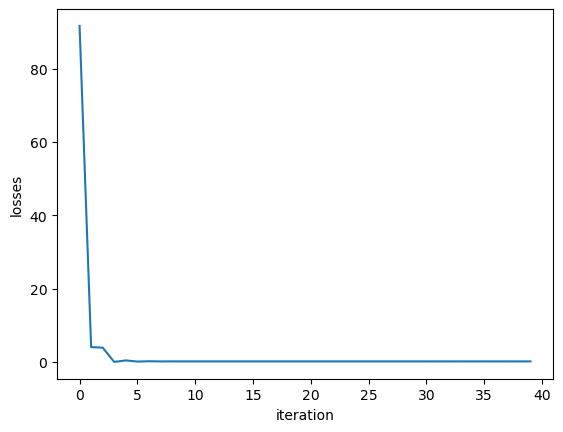

In [27]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

#### Loading again 1

In [11]:
import numpy as np
import matplotlib.pyplot as plt

data   = np.genfromtxt('../data/simple_data.csv', delimiter=',')
areas  = data[:,0:1]
prices = data[:,1:]
N = areas.size

# vector [x, b]
data = np.hstack([areas, np.ones((N,1))])

 # [w, b]
theta = np.array([[-0.34],
                  [0.049]])

print(data)
print(theta)
print(prices)

[[6.7 1. ]
 [4.6 1. ]
 [3.5 1. ]
 [5.5 1. ]]
[[-0.34 ]
 [ 0.049]]
[[9.1]
 [5.9]
 [4.6]
 [6.7]]


In [12]:
# params
lr = 0.01
epoch_max = 20
m = 2

# logging
losses = []

for epoch in range(epoch_max):
    for i in range(0, N, m):
        # get m samples
        x = data[i:i+m, :]
        y = prices[i:i+m, :]

        # predict y_hat
        y_hat = x.dot(theta)

        # compute loss
        #loss = np.multiply((y_hat-y), (y_hat-y))
        #losses.append(np.mean(loss))
        loss = (1/m)*(y_hat-y).T.dot((y_hat-y))
        losses.append(loss[0][0])

        # compute gradient
        k = 2*(y_hat-y)
        gradients = x.T.dot(k) / m

        # update weights
        theta = theta - lr*gradients

        # debug
        # print("\n----------------------------")
        # print("x shape", x.shape)
        # print("y shape", y.shape)
        # print("y_hat shape", y_hat.shape)
        # print("k shape", k.shape)
        # print("gradients shape", gradients.shape)
        # print("theta shape", theta.shape)
        # print("----------------------------")
        '''
            ----------------------------
            x shape (2, 2)
            y shape (2, 1)
            y_hat shape (2, 1)
            k shape (2, 1)
            gradients shape (2, 1)
            theta shape (2, 1)
            ----------------------------
        '''

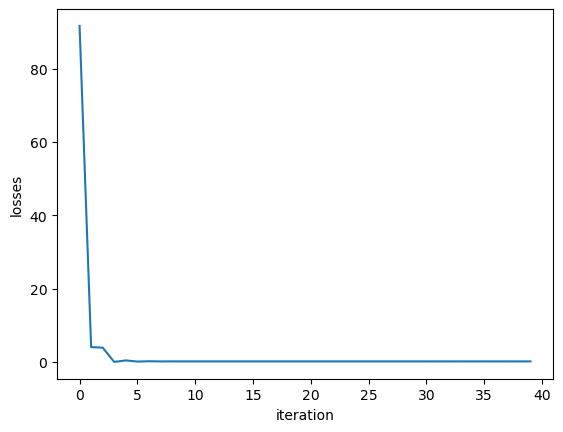

In [13]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

In [14]:
theta

array([[1.2301407 ],
       [0.29253171]])

0.2925317104358212 1.230140702568926


/tmp/ipykernel_6027/2633131423.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_data = range(max(0, int(min(areas) - 1)), int(max(areas)) + 2)


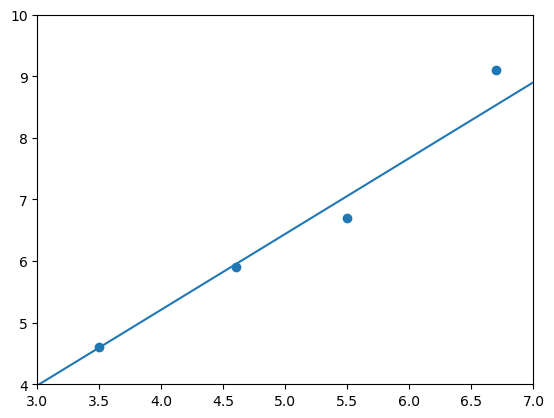

In [15]:
# x_data = range(2, 8) #do not hard code
x_data = range(max(0, int(min(areas) - 1)), int(max(areas)) + 2)


data   = np.genfromtxt('../data/simple_data.csv', delimiter=',')
areas  = data[:,0:1]
prices = data[:,1:]

predicted_w, predicted_b = theta[0, 0], theta[1, 0]
print(predicted_b, predicted_w)
y_data = [x*predicted_w + predicted_b for x in x_data]
plt.plot(x_data, y_data)
#--------------------------------------
plt.scatter(areas, prices)
plt.xlim(3,7)
plt.ylim(4,10)
plt.show()

## 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data   = np.genfromtxt('../data/simple_data.csv', delimiter=',')
areas  = data[:,0:1]
prices = data[:,1:]
N = areas.size

# vector [1, x]
data = np.hstack([np.ones((N, 1)), areas])

 # [b, w]
theta = np.array([[0.049],
                  [-0.34]])

print("data :\n", data)
print("theta :\n", theta)
print("prices :\n", prices)
print("----------")
print("data shape:", data.shape)
print("theta shape:", theta.shape)
print("prices shape:", prices.shape)

data :
 [[1.  6.7]
 [1.  4.6]
 [1.  3.5]
 [1.  5.5]]
theta :
 [[ 0.049]
 [-0.34 ]]
prices :
 [[9.1]
 [5.9]
 [4.6]
 [6.7]]
----------
data shape: (4, 2)
theta shape: (2, 1)
prices shape: (4, 1)


In [ ]:
# params
lr = 0.01
epoch_max = 20
m = 2

# logging
losses = []

for epoch in range(epoch_max):
    for i in range(0, N, m):
        # get m samples
        x = data[i:i+m, :]
        y = prices[i:i+m, :]

        # predict y_hat
        y_hat = x.dot(theta)

        # compute loss
        loss = np.multiply((y_hat-y), (y_hat-y))
        losses.append(np.mean(loss))

        # compute gradient
        k = 2 * (y_hat-y)
        gradients = x.T.dot(k)

        # update weights
        theta = theta - lr * (gradients / m)

print(theta)

[[0.29253171]
 [1.2301407 ]]


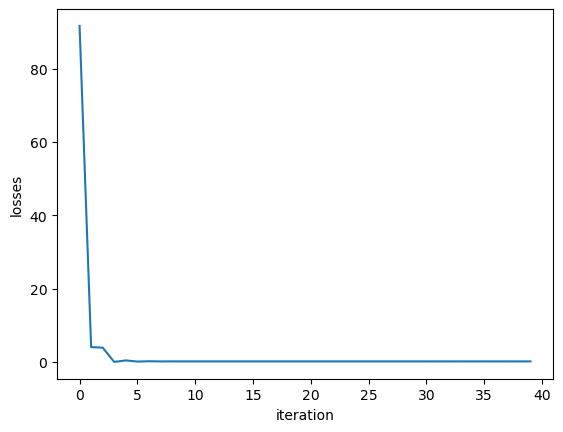

In [9]:
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

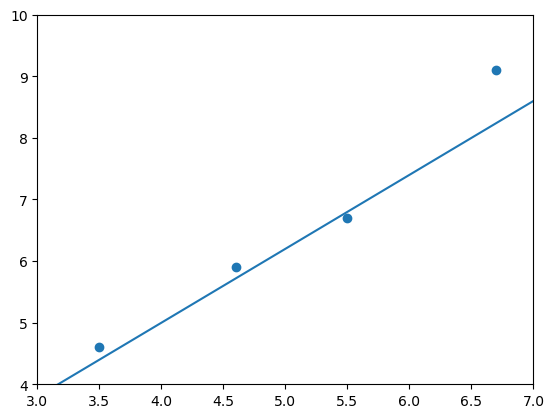

In [7]:
predicted_w = 1.2
predicted_b = 0.2

x_data = range(2, 8)
y_data = [x * predicted_w + predicted_b for x in x_data]
plt.plot(x_data, y_data)

#--------------------------------------
plt.scatter(areas, prices)
plt.xlim(3,7)
plt.ylim(4,10)
plt.show()